# Sensitivity Exploration

We will look at the sensitivity of the zonal statistics and the correlation with the PurpleAir based on weight for the surfaces and sigma of traffic dispersion.

In [83]:
# Import Libraries

import os

# Analysis

import numpy as np
import pandas as pd
import geopandas as gpd

# Visualizations

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
# Load calculate stats

stats_df = pd.read_csv('Sensitivity_Stats.csv')

In [15]:
stats_df.head()

Hazard_Index_Filename  Sigma  I_weight  T_weight  \
0  11.0sig_45I-55T_HazardIndex.tif   11.0        45        55   
1   4.0sig_55I-44T_HazardIndex.tif    4.0        55        44   
2  11.5sig_60I-40T_HazardIndex.tif   11.5        60        40   
3  10.5sig_60I-40T_HazardIndex.tif   10.5        60        40   
4   9.5sig_50I-50T_HazardIndex.tif    9.5        50        50   

   PurpleAir_RMSE_mpls  Best_IndexMean  Best_IndexMean_stdev  \
0           131.511031        0.094737              0.071565   
1           152.036742        0.030929              0.041456   
2           138.280668        0.072301              0.054080   
3           139.943639        0.066728              0.053004   
4           137.208071        0.075594              0.062951   

   Business and Industrial_IndexMean  Business and Industrial_IndexMean_stdev  \
0                           0.222827                                 0.102698   
1                           0.104039                                 0.083201   
2                           0.180188                                 0.090245   
3                           0.170706                                 0.089503   
4                           0.188190                                 0.095793   

   Definitely Declining_IndexMean  ...  Open Water_IndexMean  \
0                        0.158828  ...              0.130855   
1                        0.063758  ...              0.045320   
2                        0.122768  ...              0.102285   
3                        0.115814  ...              0.095331   
4                        0.131781  ...              0.106361   

   Open Water_IndexMean_stdev  Park / Open Space_IndexMean  \
0                    0.083641                     0.126640   
1                    0.052595                     0.058675   
2                    0.063215                     0.096108   
3                    0.061449                     0.091536   
4                    0.072936                     0.106680   

   Park / Open Space_IndexMean_stdev  Still Desirable_IndexMean  \
0                           0.103722                   0.110532   
1                           0.065462                   0.036886   
2                           0.077260                   0.084628   
3                           0.076368                   0.078427   
4                           0.092410                   0.088694   

   Still Desirable_IndexMean_stdev  Uncertain_IndexMean  \
0                         0.087112             0.079678   
1                         0.048740             0.029416   
2                         0.065283             0.063616   
3                         0.063288             0.058546   
4                         0.075226             0.063903   

   Uncertain_IndexMean_stdev  Undeveloped_IndexMean  \
0                   0.058457               0.111997   
1                   0.026347               0.050125   
2                   0.046431               0.084801   
3                   0.044960               0.080649   
4                   0.050785               0.093915   

   Undeveloped_IndexMean_stdev  
0                     0.093125  
1                     0.063522  
2                     0.070045  
3                     0.069460  
4                     0.083758  

[5 rows x 23 columns]

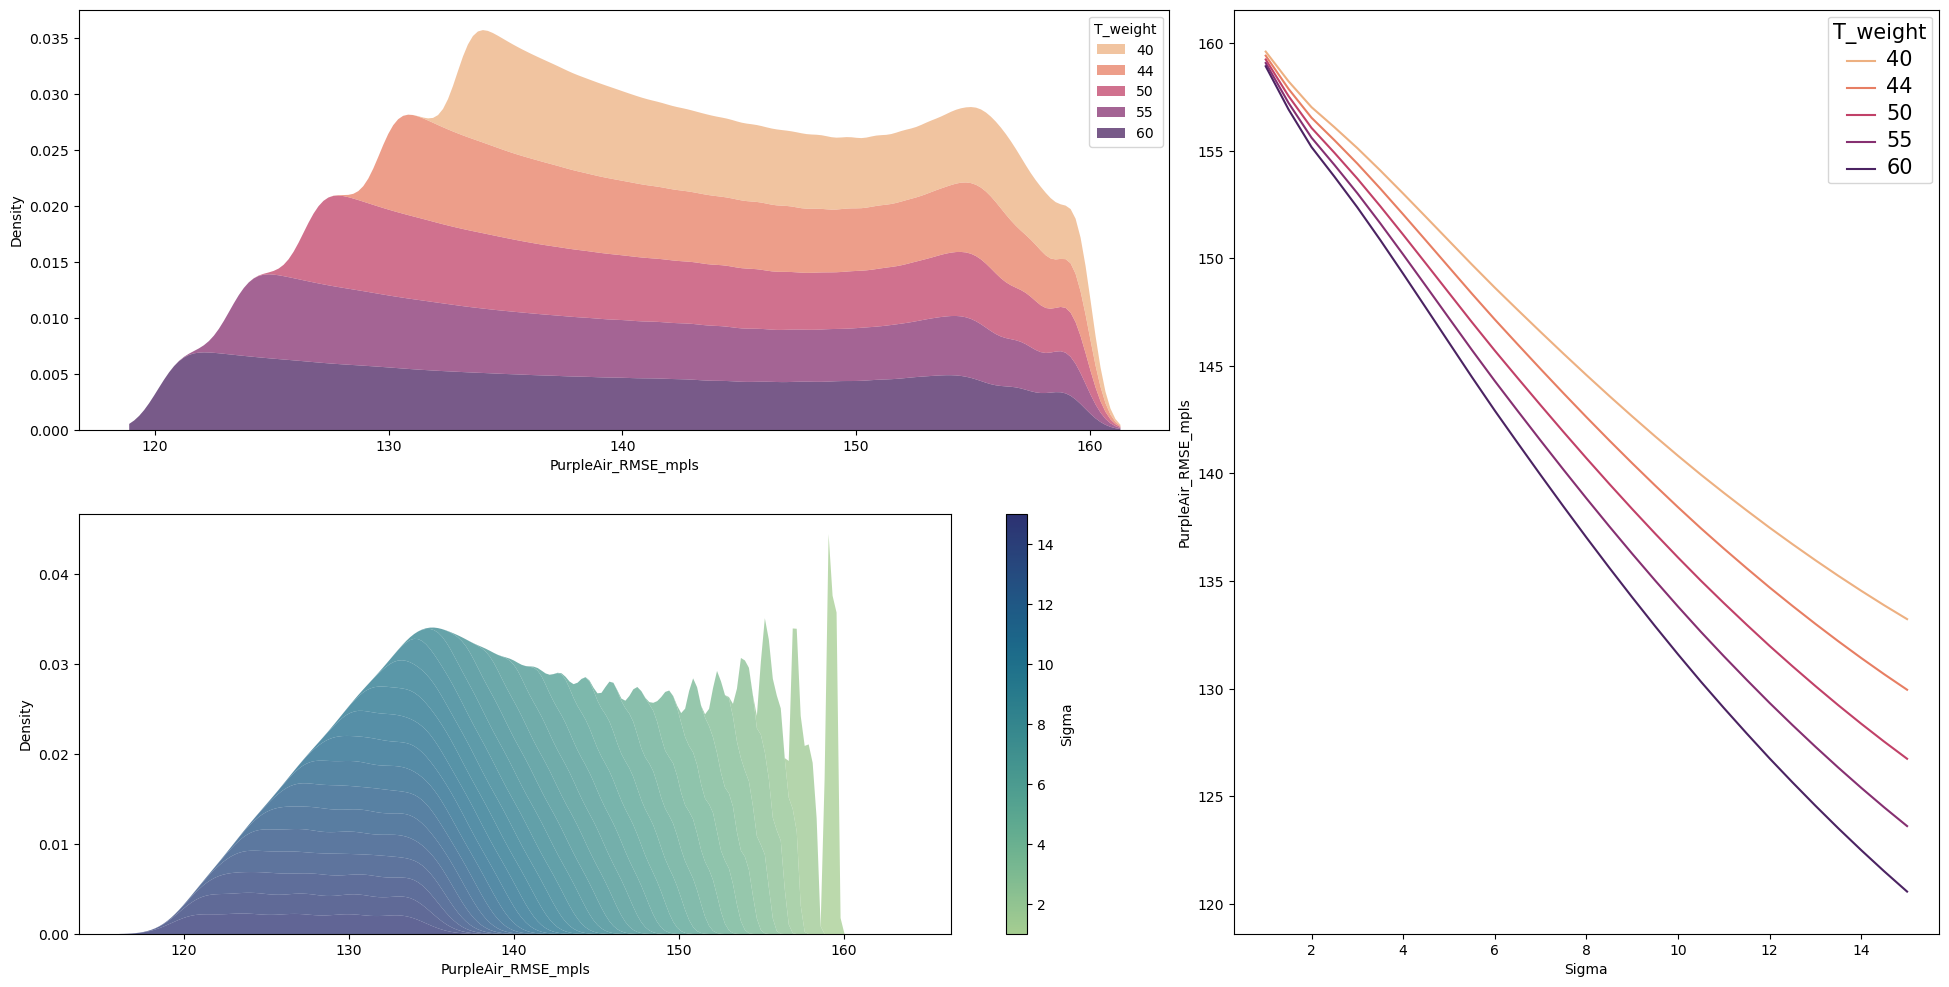

In [168]:
## Initialize

sns_df = stats_df[['Sigma', 'T_weight', 'PurpleAir_RMSE_mpls']]

# Describe mosaic for plot
mosaic = '''
AAABB
CCCBB
'''

# Initialize Figure
f, axs = plt.subplot_mosaic(mosaic, figsize = (24,12))

sns.kdeplot(data=sns_df, x="PurpleAir_RMSE_mpls", hue="T_weight", palette = 'flare', multiple = 'stack', ax=axs['A'],
           linewidth=0, bw_adjust = .15)
sns.kdeplot(data=sns_df, x="PurpleAir_RMSE_mpls", hue="Sigma", palette = 'crest', multiple = 'stack', legend = False,
            ax=axs['C'],linewidth=0, bw_adjust = .4)#, legend = False)
cmap = sns.color_palette('crest', as_cmap = True)
norm = mpl.colors.Normalize(vmin=1, vmax=15)

f.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=axs['C'], orientation='vertical', label='Sigma') # Add colorbar

sns.lineplot(data = sns_df, 
                x= 'Sigma', 
                y= 'PurpleAir_RMSE_mpls', 
                hue = 'T_weight', 
                palette = 'flare',
                ax = axs['B'])

plt.setp(axs['B'].get_legend().get_texts(), fontsize=15)
# for legend title
plt.setp(axs['B'].get_legend().get_title(), fontsize=15)
# f.tight_layout()
plt.savefig('Sensitivity.png', dpi = 200)

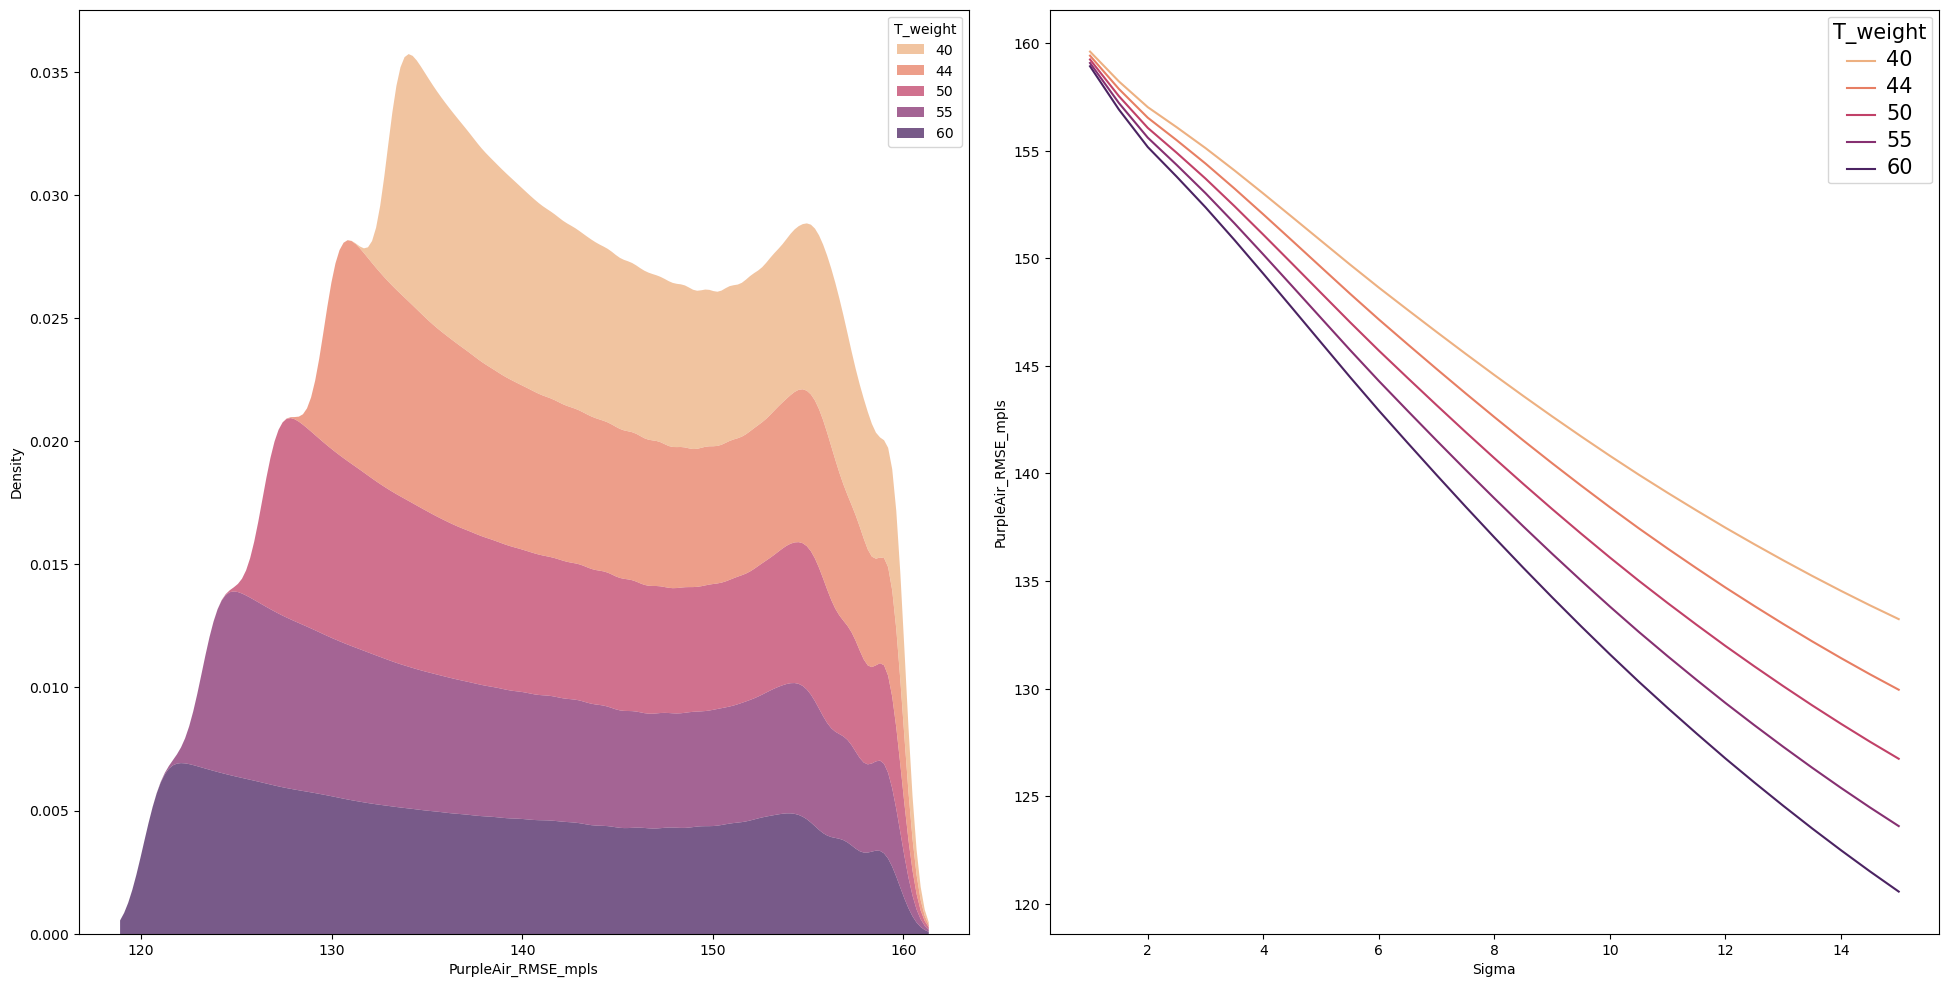

In [165]:
## Initialize

sns_df = stats_df[['Sigma', 'T_weight', 'PurpleAir_RMSE_mpls']]

# Describe mosaic for plot
mosaic = '''
AABB
'''

# Initialize Figure
f, axs = plt.subplot_mosaic(mosaic, figsize = (24,12))

sns.kdeplot(data=sns_df, x="PurpleAir_RMSE_mpls", hue="T_weight", palette = 'flare', multiple = 'stack', ax=axs['A'],
           linewidth=0, bw_adjust = .15)
# sns.kdeplot(data=sns_df, x="PurpleAir_RMSE_mpls", hue="Sigma", palette = 'crest', multiple = 'stack', legend = False,
#             ax=axs['C'],linewidth=0, bw_adjust = .4)#, legend = False)
cmap = sns.color_palette('crest', as_cmap = True)
norm = mpl.colors.Normalize(vmin=1, vmax=15)

# f.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
#              ax=axs['C'], orientation='vertical', label='Sigma') # Add colorbar

sns.lineplot(data = sns_df, 
                x= 'Sigma', 
                y= 'PurpleAir_RMSE_mpls', 
                hue = 'T_weight', 
                palette = 'flare',
                ax = axs['B'])

plt.setp(axs['B'].get_legend().get_texts(), fontsize=15)
# for legend title
plt.setp(axs['B'].get_legend().get_title(), fontsize=15)
# f.tight_layout()
plt.savefig('Sensitivity.png', dpi = 200)

<AxesSubplot: xlabel='PurpleAir_RMSE_mpls', ylabel='Density'>

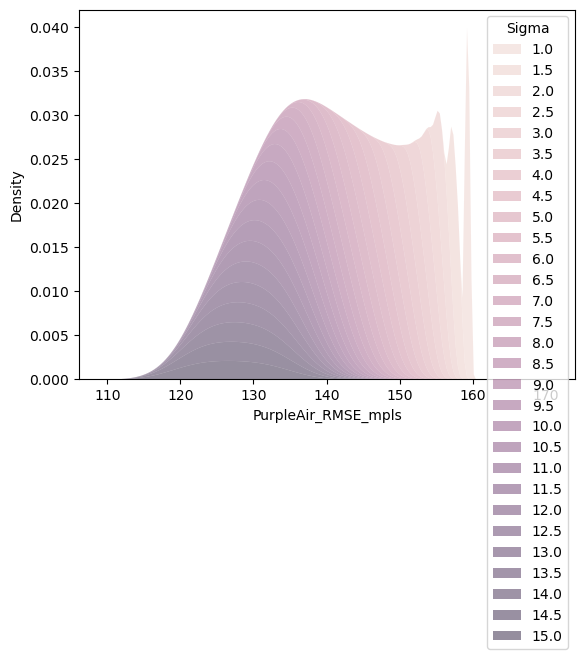

In [51]:
sns.kdeplot(data=sns_df, x="PurpleAir_RMSE_mpls", hue="Sigma", multiple = 'stack', 
           alpha=.5, linewidth=0)

In [9]:
# Looks like the best models were maybe

# 40I-60T, 15sig
# Plus or minus 5 weight percentages
# and high sigma 14+

In [10]:
# Let's check the zonalstats for the best models?

bestrmse_filename = stats_df.iloc[stats_df.PurpleAir_RMSE_mpls.argmin()].Hazard_Index_Filename
other_good_ones = ['15.0sig_45I-55T_HazardIndex.tif',
                   '14.5sig_40I-60T_HazardIndex.tif',
                   '14.5sig_45I-55T_HazardIndex.tif',
                   '14.0sig_40I-60T_HazardIndex.tif',
                   '14.0sig_45I-55T_HazardIndex.tif']

filenames = [bestrmse_filename] + other_good_ones 

In [11]:
# Check out averages in the various classes

interesting_columns = ['Hazardous_IndexMean',
                       'Definitely Declining_IndexMean',
                       'Still Desirable_IndexMean',
                       'Best_IndexMean',
                       'Open Water_IndexMean',
                       'Business and Industrial_IndexMean',
                       'Uncertain_IndexMean',
                       'Undeveloped_IndexMean',
                       'Park / Open Space_IndexMean'
                      ]

HSG_codes = ['Hazardous', 'Definitely Declining', 'Still Desirable',
             'Best', 'Open Water', 'Business and Industrial', 'Uncertain', 
             'Undeveloped', 'Park / Open Space']

    

~~~
15.0sig_40I-60T_HazardIndex.tif
~~~


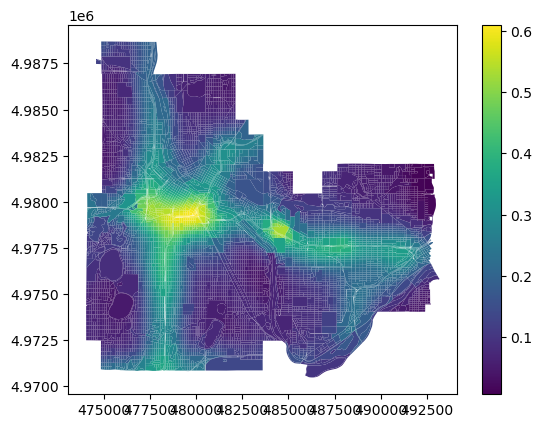

28    120.576271
Name: PurpleAir_RMSE_mpls, dtype: float64


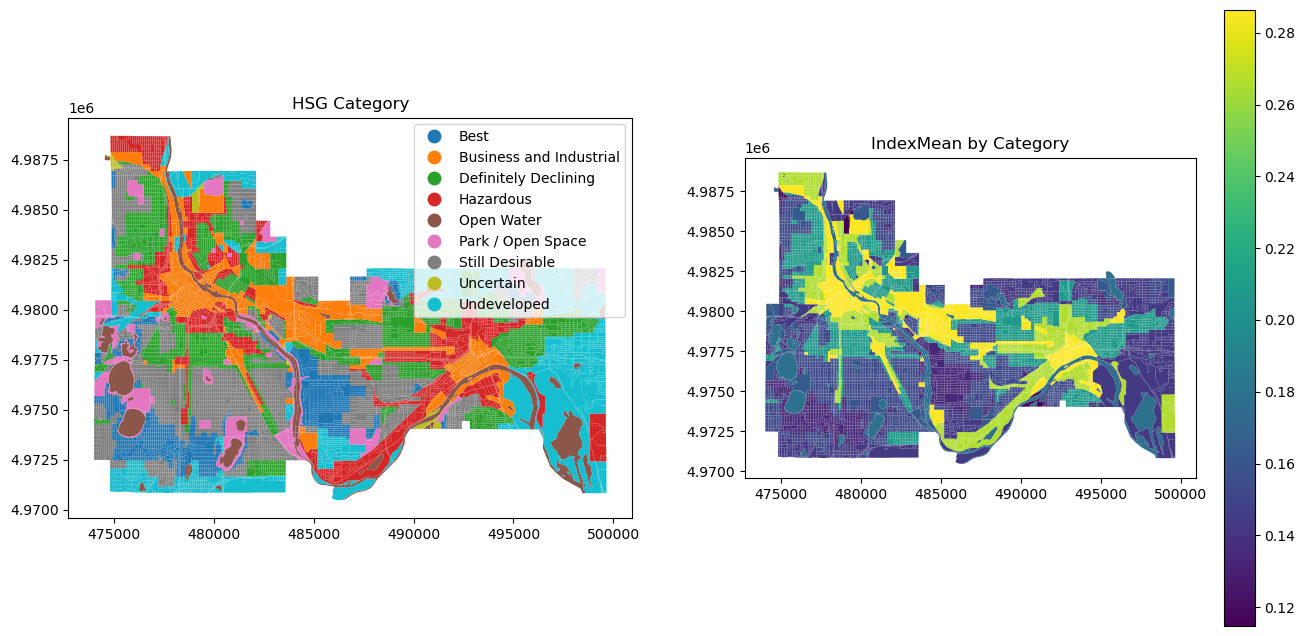

~~~
~~~
15.0sig_45I-55T_HazardIndex.tif
~~~


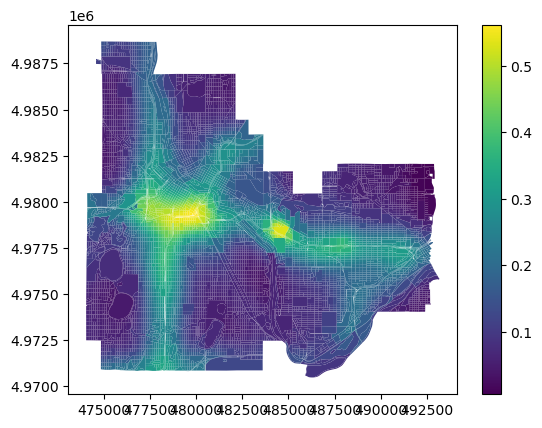

46    123.618565
Name: PurpleAir_RMSE_mpls, dtype: float64


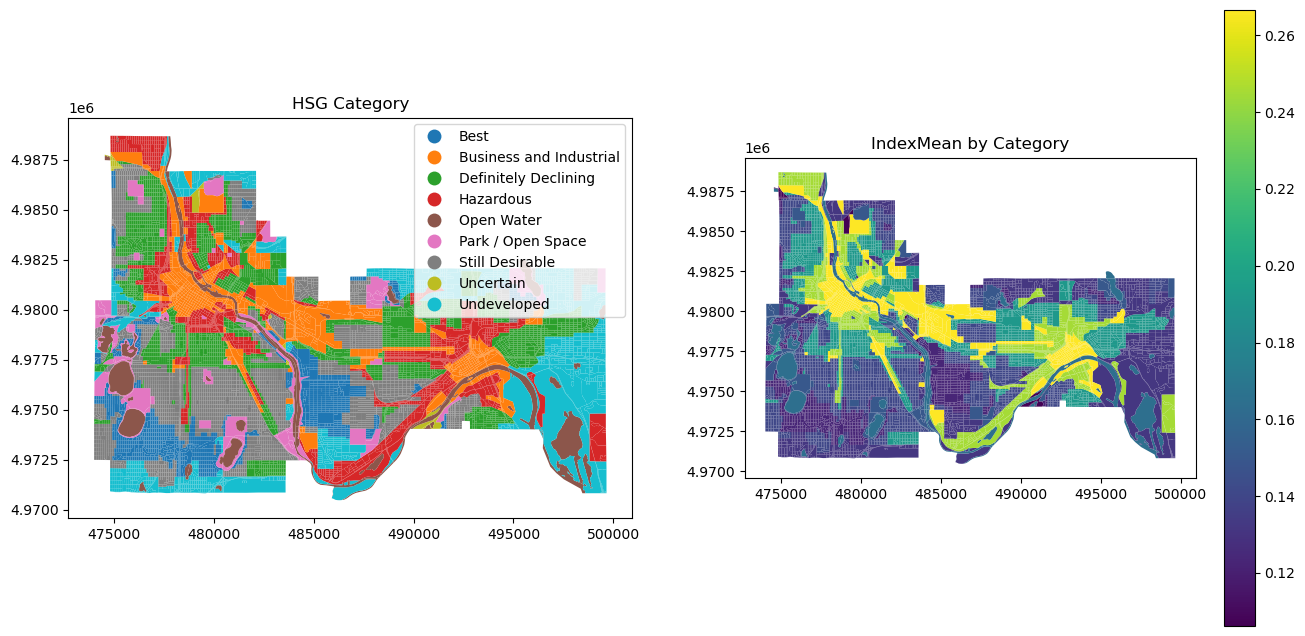

~~~
~~~
14.5sig_40I-60T_HazardIndex.tif
~~~


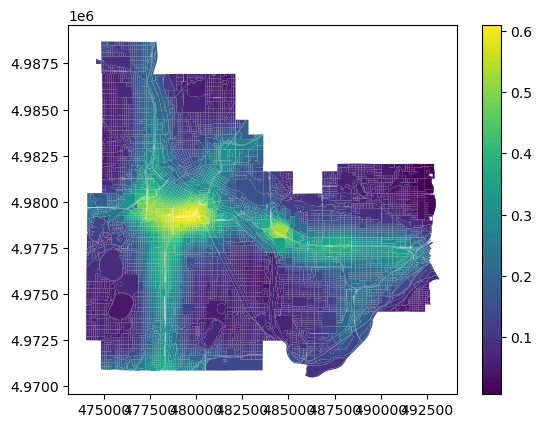

38    121.518274
Name: PurpleAir_RMSE_mpls, dtype: float64


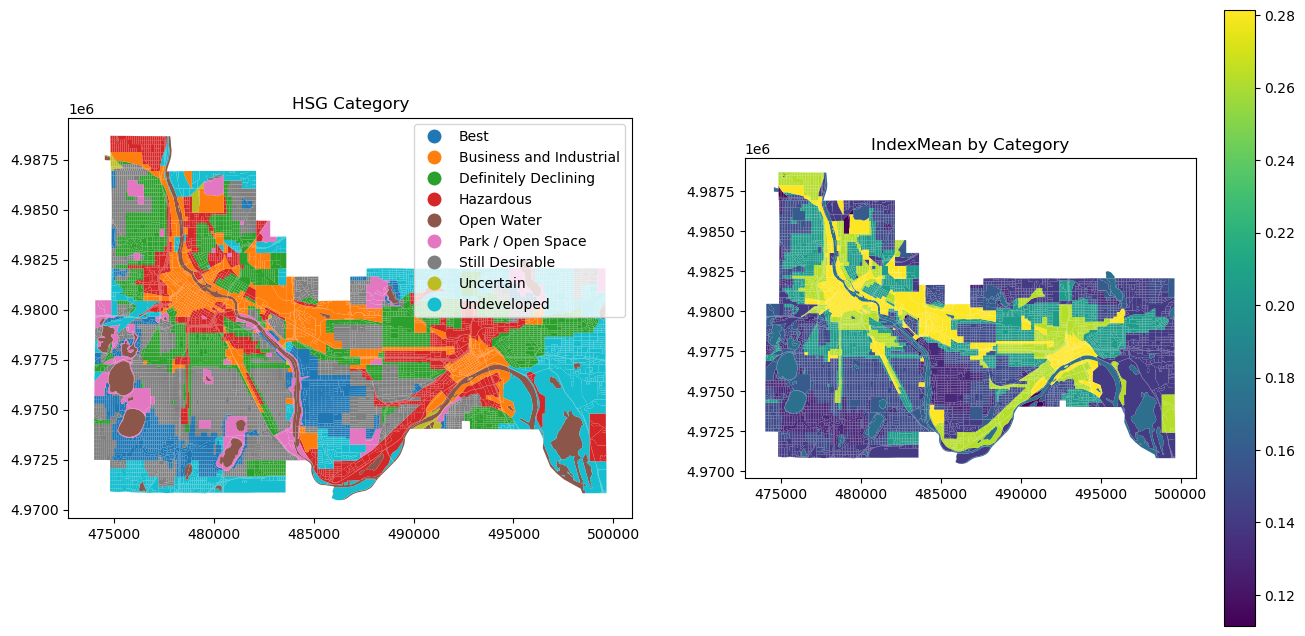

~~~
~~~
14.5sig_45I-55T_HazardIndex.tif
~~~


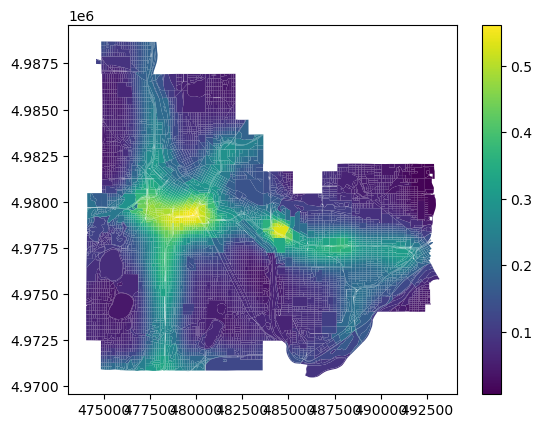

68    124.488656
Name: PurpleAir_RMSE_mpls, dtype: float64


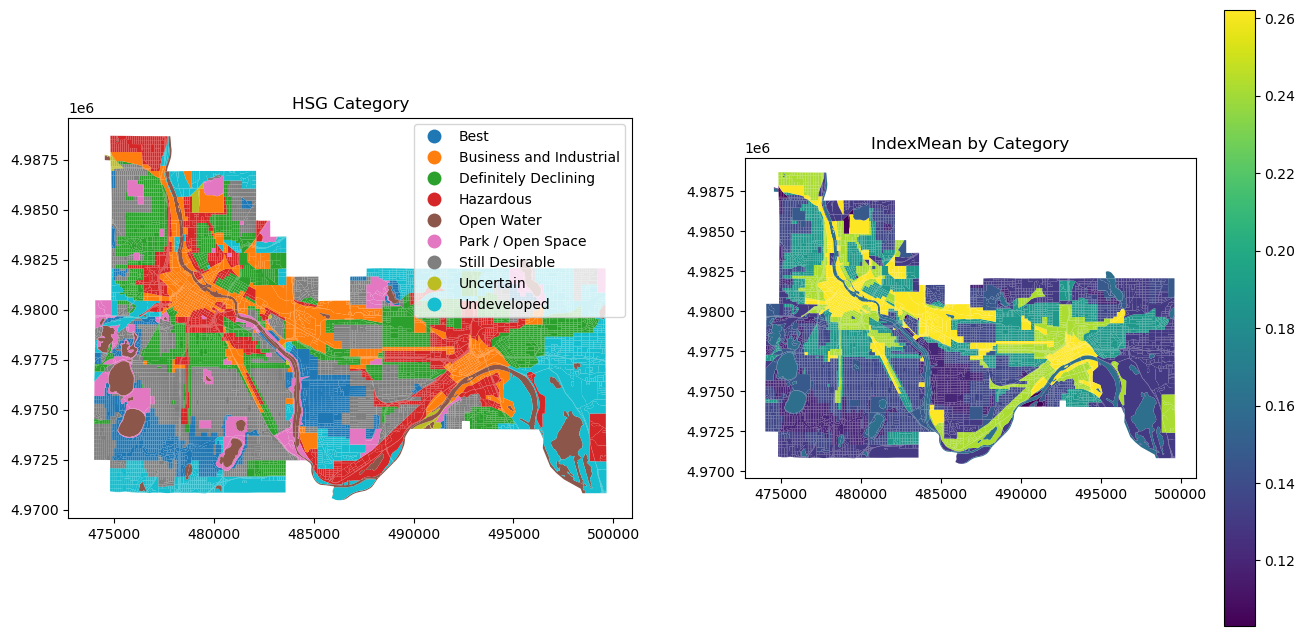

~~~
~~~
14.0sig_40I-60T_HazardIndex.tif
~~~


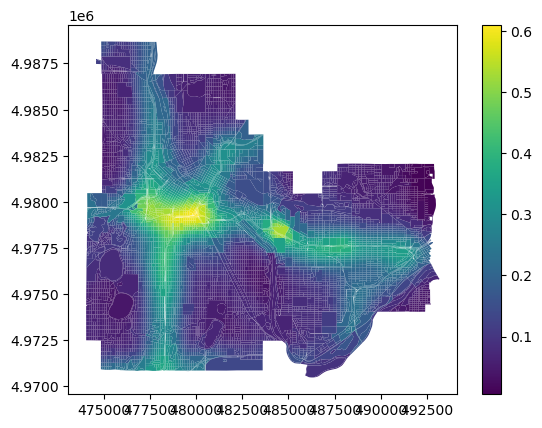

25    122.498322
Name: PurpleAir_RMSE_mpls, dtype: float64


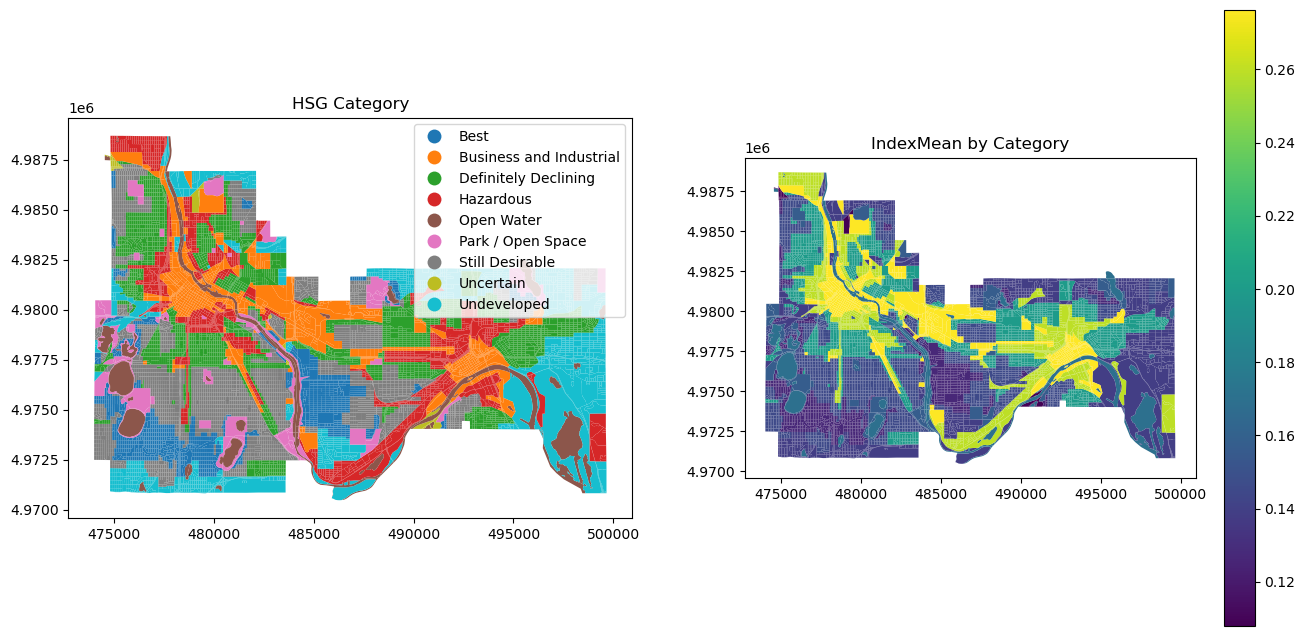

~~~
~~~
14.0sig_45I-55T_HazardIndex.tif
~~~


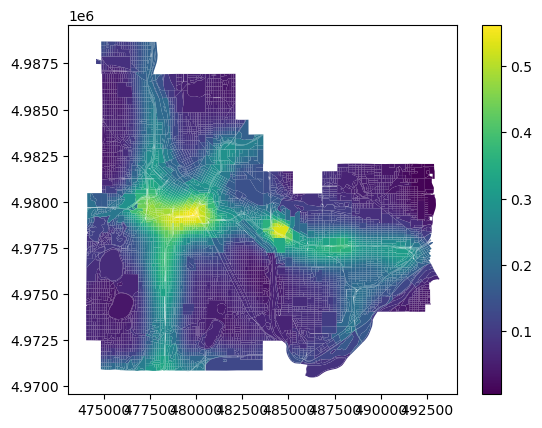

5    125.394491
Name: PurpleAir_RMSE_mpls, dtype: float64


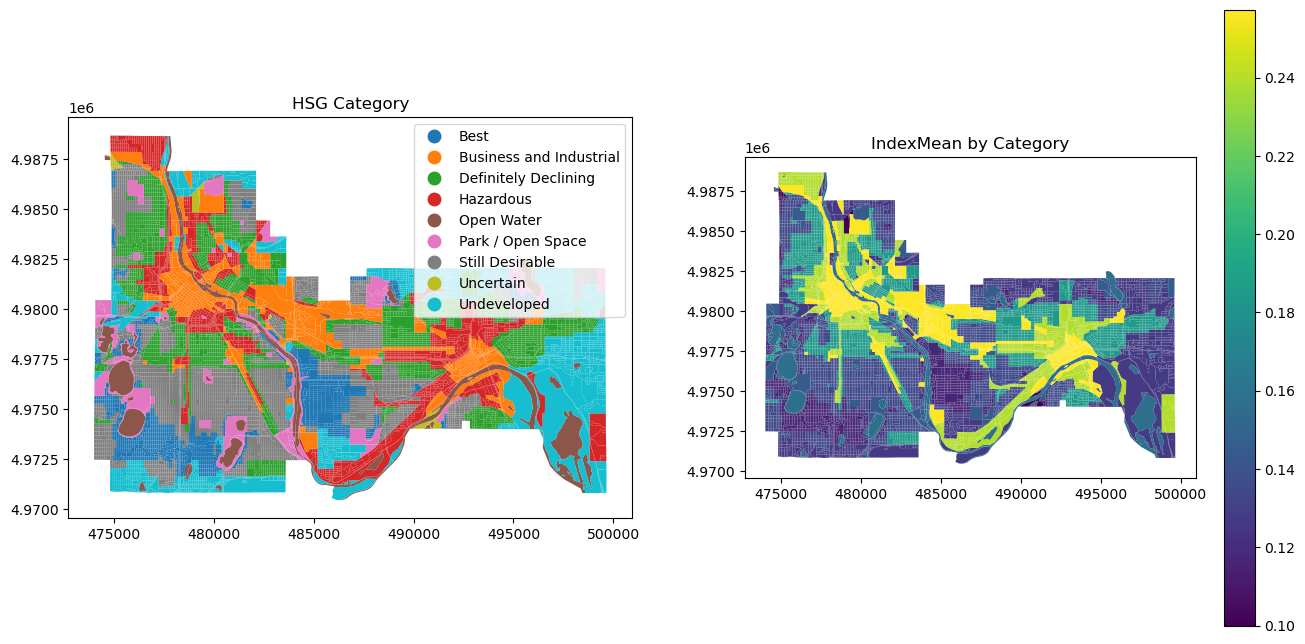

~~~


In [12]:
# Load Zonal Stats and check them out spatially again

for filename in filenames:
    print('~~~')
    print(filename)
    print('~~~')
    
    zonalstats_filename = filename[:-4] + '_Zonal_Stats.geojson'
    zonalstats_path = os.path.join(os.getcwd(), 'Zonal_Stats', zonalstats_filename)
    zonal_stats = gpd.read_file(zonalstats_path)
    
    # Plot the zonal mean
    
    zonal_stats.plot('mean', legend = True)
    plt.show()
    
    # Plot HSG_SCALE and Index Mean by SCALE
    
    stats = stats_df[stats_df.Hazard_Index_Filename == filename]
    interesting_stats = stats[interesting_columns].values[0]
    print(stats.PurpleAir_RMSE_mpls)
    
    column_to_stat_map = dict(zip(HSG_codes, interesting_stats))
    
    f, axs = plt.subplots(1,2, figsize = (16,8))
    zonal_stats = gpd.read_file(zonalstats_path)
    zonal_stats['IndexMean'] = zonal_stats.HSG_SCALE.apply(lambda x: column_to_stat_map[x])
    zonal_stats.plot('HSG_SCALE', legend = True, ax = axs[0])
    axs[0].set_title('HSG Category')
    zonal_stats.plot('IndexMean', legend = True, ax = axs[1])
    axs[1].set_title('IndexMean by Category')
    plt.show()
    print('~~~')

In [ ]:
# Time for anova? Or could look at Racial Covenants - Mapping Prejudice